In [1]:
import pandas as pd

'na_value' convert data to NaN form

In [2]:
df=pd.read_csv('dataset/adult.csv',header=None,na_values=[' ?','*'])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
         'relationship','race','gender','capital-gain','capital-loss','hours-per-week',
         'native-country','income']

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.isnull().sum()

age                  0
workclass         3672
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        3686
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    1166
income               0
dtype: int64

In [10]:
c=df.occupation.value_counts().index[0]

In [11]:
c

' Prof-specialty'

In [12]:
df.fillna({'occupation':c},inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         3672
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    1166
income               0
dtype: int64

In [14]:
df[df.workclass==" ?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [15]:
df.income.value_counts()

 <=50K    49440
 >50K     15682
Name: income, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
df.shape

(60338, 15)

In [19]:
df.income[0]

' <=50K'

In [20]:
df.income=df.income.map({' <=50K':0,' >50K':1})

In [21]:
df.income.value_counts()

0    45322
1    15016
Name: income, dtype: int64

In [22]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [23]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
df.select_dtypes(include=['object']).head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [25]:
for col_name in df.columns:
    if df[col_name].dtype=='object':
        unique_cat=df[col_name].nunique()
        print('feature {} has {} unique categories'.format(col_name,unique_cat))

feature workclass has 8 unique categories
feature education has 16 unique categories
feature marital-status has 7 unique categories
feature occupation has 14 unique categories
feature relationship has 6 unique categories
feature race has 5 unique categories
feature gender has 2 unique categories
feature native-country has 41 unique categories


In [26]:

df['native-country'].value_counts()

 United-States                 55022
 Mexico                         1220
 Philippines                     376
 Germany                         256
 Puerto-Rico                     218
 Canada                          214
 India                           200
 El-Salvador                     200
 Cuba                            184
 England                         172
 Jamaica                         160
 South                           142
 Italy                           136
 China                           136
 Dominican-Republic              134
 Vietnam                         128
 Guatemala                       126
 Japan                           118
 Columbia                        112
 Poland                          112
 Haiti                            84
 Iran                             84
 Taiwan                           84
 Portugal                         68
 Nicaragua                        66
 Peru                             60
 Greece                           58
 

In [27]:
df['native-country']=['US' if x==' United-States' else 'other' for x in df['native-country']]

In [28]:
df['native-country'].value_counts()

US       55022
other     5316
Name: native-country, dtype: int64

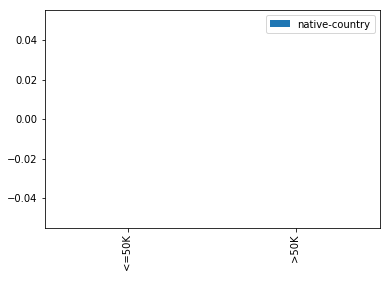

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

t_50=df[df.income==0]['native-country'].value_counts()
gt_50=df[df.income==1]['native-country'].value_counts()

df_new=pd.DataFrame(t_50,gt_50)
df_new.index=[' <=50K',' >50K']
df_new.plot(kind='bar',stacked=True)


In [30]:
c=df.select_dtypes(include=['object'])

In [31]:
c.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [32]:
x1=pd.get_dummies(df[c.columns])

In [33]:
x1.shape

(60338, 60)

In [34]:
x1.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native-country_US,native-country_other
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [35]:
new_df=pd.concat([x1,df.select_dtypes(exclude=['object'])],axis=1)


In [36]:
new_df.shape

(60338, 67)

In [37]:
new_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,gender_ Male,native-country_US,native-country_other,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,39,77516,13,2174,0,40,0
1,0,0,0,0,0,1,0,0,0,0,...,1,1,0,50,83311,13,0,0,13,0
2,0,0,0,1,0,0,0,0,0,0,...,1,1,0,38,215646,9,0,0,40,0
3,0,0,0,1,0,0,0,0,0,1,...,1,1,0,53,234721,7,0,0,40,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,28,338409,13,0,0,40,0


In [49]:
x=new_df.drop('income',1)
#x=x.values

In [50]:
x.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,gender_ Female,gender_ Male,native-country_US,native-country_other,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,28,338409,13,0,0,40


In [51]:
x=x.values

In [52]:
y=new_df['income']
y=y.values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [72]:
from sklearn.metrics import recall_score,roc_auc_score,confusion_matrix,precision_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [73]:
rf=LogisticRegression()

In [74]:
rf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
pred=rf.predict(x_test)

In [85]:
recall_score(y_test,pred)

0.27369826435246997

In [92]:
rf.score(x_test,y_test)
#or
#accuracy_score(y_test,pred)

0.7943652635067948

In [93]:
precision_score(y_test,pred)

0.728500355366027

In [94]:
roc_auc_score(y_test,pred)

0.6200060986665348